# GIS data processing

## Shape files

Load the required modules.

In [1]:
from fiona import collection
import matplotlib.pyplot as plt
%matplotlib inline

Create a fiona collection from the shape files.

In [2]:
input = collection('Data/USA.gdb', 'r')

Check the schema of the shape file.

In [3]:
input.schema

{'geometry': 'MultiPolygon',
 'properties': OrderedDict([('NAME', 'str:110'),
              ('COUNTRY', 'str:20'),
              ('STATEABB', 'str:20'),
              ('Shape_Length', 'float'),
              ('Shape_Area', 'float'),
              ('BORDER', 'int'),
              ('REGION', 'str:20')])}

List the states in the US.

In [4]:
states = set()
for region in input:
    states.add(region['properties']['NAME'])
print('number of states in US: {0}'.format(len(states)))
print('states: ', end='')
print(*states, sep=', ')

number of states in US: 51
states: Delaware, Washington, Texas, Maryland, Virginia, Maine, Colorado, New York, Alaska, Kentucky, Kansas, Indiana, Arkansas, Alabama, Hawaii, Utah, Montana, Nevada, Rhode Island, West Virginia, Missouri, California, District of Columbia, Michigan, New Hampshire, South Dakota, Idaho, Iowa, Mississippi, Illinois, Oregon, Nebraska, Minnesota, Connecticut, North Carolina, Florida, Pennsylvania, South Carolina, North Dakota, New Jersey, Vermont, Ohio, Tennessee, Georgia, Louisiana, New Mexico, Massachusetts, Oklahoma, Arizona, Wyoming, Wisconsin


Define a function that will return the points that define the polygon for a region.

In [5]:
def get_region(input, n):
    return input[n]['geometry']['coordinates'][0][0]

Plot all regions in the shapefile, this will be a map of the USA.

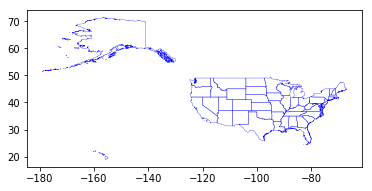

In [6]:
plt.axes().set_aspect('equal')
for i in input.keys():
    region = get_region(input, i)
    x = [x[0] for x in region]
    y = [x[1] for x in region]
    plt.plot(x, y, 'b', linewidth=0.3)

The bounds of the entire USA are given by an attribute.

In [7]:
input.bounds

(-179.13073424448964,
 18.913788476756963,
 -66.98181454720344,
 71.39842062001577)

Define a function that plots the state with the given name.

In [8]:
def plot_state(input, name):
    plt.axes().set_aspect('equal')
    for i in input.keys():
        if input[i]['properties']['NAME'] == name:
            region = get_region(input, i)
            x = [t[0] for t in region]
            y = [t[1] for t in region]
            plt.plot(x, y, 'b', linewidth=0.7)

Plot Florida's outline.

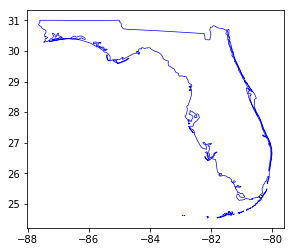

In [9]:
plot_state(input, 'Florida')

## GeoJSON files

### Reading GeoJSON files & Shapely

Load the required modules.

In [63]:
import geojson
import shapely

In [58]:
data = geojson.load(open('Data/countries.geo.json'))
countries = data['features']

In [59]:
country_ids = [country['id'] for country in countries]
country_ids

['AFG',
 'AGO',
 'ALB',
 'ARE',
 'ARG',
 'ARM',
 'ATA',
 'ATF',
 'AUS',
 'AUT',
 'AZE',
 'BDI',
 'BEL',
 'BEN',
 'BFA',
 'BGD',
 'BGR',
 'BHS',
 'BIH',
 'BLR',
 'BLZ',
 'BMU',
 'BOL',
 'BRA',
 'BRN',
 'BTN',
 'BWA',
 'CAF',
 'CAN',
 'CHE',
 'CHL',
 'CHN',
 'CIV',
 'CMR',
 'COD',
 'COG',
 'COL',
 'CRI',
 'CUB',
 '-99',
 'CYP',
 'CZE',
 'DEU',
 'DJI',
 'DNK',
 'DOM',
 'DZA',
 'ECU',
 'EGY',
 'ERI',
 'ESP',
 'EST',
 'ETH',
 'FIN',
 'FJI',
 'FLK',
 'FRA',
 'GAB',
 'GBR',
 'GEO',
 'GHA',
 'GIN',
 'GMB',
 'GNB',
 'GNQ',
 'GRC',
 'GRL',
 'GTM',
 'GUF',
 'GUY',
 'HND',
 'HRV',
 'HTI',
 'HUN',
 'IDN',
 'IND',
 'IRL',
 'IRN',
 'IRQ',
 'ISL',
 'ISR',
 'ITA',
 'JAM',
 'JOR',
 'JPN',
 'KAZ',
 'KEN',
 'KGZ',
 'KHM',
 'KOR',
 'CS-KM',
 'KWT',
 'LAO',
 'LBN',
 'LBR',
 'LBY',
 'LKA',
 'LSO',
 'LTU',
 'LUX',
 'LVA',
 'MAR',
 'MDA',
 'MDG',
 'MEX',
 'MKD',
 'MLI',
 'MLT',
 'MMR',
 'MNE',
 'MNG',
 'MOZ',
 'MRT',
 'MWI',
 'MYS',
 'NAM',
 'NCL',
 'NER',
 'NGA',
 'NIC',
 'NLD',
 'NOR',
 'NPL',
 'NZL',
 'OMN'

In [66]:
def get_country_shape(countries, country_id):
    for country in countries:
        if country['id'] == country_id:
            return shapely.geometry.shape(country['geometry'])

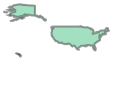

In [67]:
usa = get_country_shape(countries, 'USA')
usa

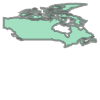

In [70]:
canada = get_country_shape(countries, 'CAN')
canada